In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.graph_objs as go 
import plotly.offline as py 
import math
from collections import Counter

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone 
import xgboost as xgb

In [3]:
df_wallets_features_classes_combined = pd.read_csv('/kaggle/input/elliptic/wallets_features_classes_combined.csv')

In [4]:
df_wallets_features_classes_combined.columns

Index(['address', 'Time step', 'class', 'num_txs_as_sender',
       'num_txs_as receiver', 'first_block_appeared_in',
       'last_block_appeared_in', 'lifetime_in_blocks', 'total_txs',
       'first_sent_block', 'first_received_block', 'num_timesteps_appeared_in',
       'btc_transacted_total', 'btc_transacted_min', 'btc_transacted_max',
       'btc_transacted_mean', 'btc_transacted_median', 'btc_sent_total',
       'btc_sent_min', 'btc_sent_max', 'btc_sent_mean', 'btc_sent_median',
       'btc_received_total', 'btc_received_min', 'btc_received_max',
       'btc_received_mean', 'btc_received_median', 'fees_total', 'fees_min',
       'fees_max', 'fees_mean', 'fees_median', 'fees_as_share_total',
       'fees_as_share_min', 'fees_as_share_max', 'fees_as_share_mean',
       'fees_as_share_median', 'blocks_btwn_txs_total', 'blocks_btwn_txs_min',
       'blocks_btwn_txs_max', 'blocks_btwn_txs_mean', 'blocks_btwn_txs_median',
       'blocks_btwn_input_txs_total', 'blocks_btwn_input_txs_min'

In [5]:
df_wallets_features_classes_combined

,address,Time step,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,111112TykSw72ztDN2WJger4cynzWYC5w,25,2,0.0,1.0,439586.0,439586.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,24.0,1.0,1.0,1.0,1.0
1,1111DAYXhoxZx2tsRnzimfozo783x1yC2,25,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
2,1111DAYXhoxZx2tsRnzimfozo783x1yC2,29,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
3,1111DAYXhoxZx2tsRnzimfozo783x1yC2,39,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
4,1111DAYXhoxZx2tsRnzimfozo783x1yC2,39,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268255,3R2Uw5MRdSSigp8AjfT7K5es6Hupm4qLSq,31,3,1.0,1.0,451684.0,451685.0,1.0,2.0,451685.0,...,0.0,0.0,0.000000,0.0,0.0,3.0,1.0,1.0,1.0,1.0
1268256,3R2VBFbqHGC4bQ7b4ixN4jZTdv7RMbEYtf,44,3,0.0,1.0,477895.0,477895.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1268257,3R2WFmRwbDeo3rMVVu5J3jjMxAuQYYWAid,9,3,0.0,1.0,407342.0,407342.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1268258,3R2WTZGYLmbJQyoDSBftJsPRvF1mSEtkh6,3,3,0.0,1.0,395235.0,395235.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [6]:
#Lọc bỏ timestep và các rows trùng nhau
df_wallets_classification = df_wallets_features_classes_combined
df_wallets_classification = df_wallets_classification.drop(columns=['Time step']).drop_duplicates()
df_wallets_classification

,address,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,first_received_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,111112TykSw72ztDN2WJger4cynzWYC5w,2,0.0,1.0,439586.0,439586.0,0.0,1.0,0.0,439586.0,...,0.0,0.0,0.000000,0.0,0.0,24.0,1.0,1.0,1.0,1.0
1,1111DAYXhoxZx2tsRnzimfozo783x1yC2,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,439589.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
9,1111VHuXEzHaRCgXbVwojtaP7Co3QABb,2,0.0,1.0,431522.0,431522.0,0.0,1.0,0.0,431522.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
10,111218KKkh1JJFRHbwM16AwCiVCc4m7he1,3,1.0,1.0,423456.0,423456.0,0.0,2.0,423456.0,423456.0,...,0.0,0.0,0.000000,0.0,0.0,4.0,1.0,1.0,1.0,1.0
12,1115LWW3xsD9jT9VRY7viCN9S34RVAAuA,2,0.0,1.0,429513.0,429513.0,0.0,1.0,0.0,429513.0,...,0.0,0.0,0.000000,0.0,0.0,5.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268254,3R2Uw5MRdSSigp8AjfT7K5es6Hupm4qLSq,3,1.0,1.0,451684.0,451685.0,1.0,2.0,451685.0,451684.0,...,0.0,0.0,0.000000,0.0,0.0,3.0,1.0,1.0,1.0,1.0
1268256,3R2VBFbqHGC4bQ7b4ixN4jZTdv7RMbEYtf,3,0.0,1.0,477895.0,477895.0,0.0,1.0,0.0,477895.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1268257,3R2WFmRwbDeo3rMVVu5J3jjMxAuQYYWAid,3,0.0,1.0,407342.0,407342.0,0.0,1.0,0.0,407342.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1268258,3R2WTZGYLmbJQyoDSBftJsPRvF1mSEtkh6,3,0.0,1.0,395235.0,395235.0,0.0,1.0,0.0,395235.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [7]:
# Bỏ unknown (class == 3) - we're classifying only 2 class (1 & 2)
data = df_wallets_classification.loc[(df_wallets_classification['class'] != 3), 'address']
df_wallets_feature_selected = df_wallets_classification.loc[df_wallets_classification['address'].isin(data)]
df_wallets_feature_selected
# Cuz the actor 

,address,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,first_received_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,111112TykSw72ztDN2WJger4cynzWYC5w,2,0.0,1.0,439586.0,439586.0,0.0,1.0,0.0,439586.0,...,0.0,0.0,0.0,0.0,0.0,24.0,1.0,1.0,1.0,1.0
9,1111VHuXEzHaRCgXbVwojtaP7Co3QABb,2,0.0,1.0,431522.0,431522.0,0.0,1.0,0.0,431522.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
12,1115LWW3xsD9jT9VRY7viCN9S34RVAAuA,2,0.0,1.0,429513.0,429513.0,0.0,1.0,0.0,429513.0,...,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0
13,1117wASFaYgJJP6MiY8cPD5DMdQda8gDZ,2,1.0,1.0,399269.0,399271.0,2.0,2.0,399271.0,399269.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0
15,111ECNFEjJsQJ6LkAsAESBGTHBvZE66oX,2,0.0,1.0,423462.0,423462.0,0.0,1.0,0.0,423462.0,...,0.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268243,3R2KQxz2Uk7xF9bfDGffTn52NrfnBjdaLy,2,0.0,1.0,411364.0,411364.0,0.0,1.0,0.0,411364.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0
1268244,3R2LAgPtnjeU2XdyR1GUXaTzKmh81VETYm,2,0.0,1.0,435555.0,435555.0,0.0,1.0,0.0,435555.0,...,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0
1268251,3R2SZEK2UggNm1ntkXTe8eoea11sxg9vjw,2,0.0,1.0,421443.0,421443.0,0.0,1.0,0.0,421443.0,...,0.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,1.0,1.0
1268252,3R2TfX1PDN93SHbDXZqYPCn1cgmCeLMBra,2,0.0,1.0,437572.0,437572.0,0.0,1.0,0.0,437572.0,...,0.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,1.0,1.0


In [8]:
df_wallets_feature_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265354 entries, 0 to 1268253
Data columns (total 57 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   address                        265354 non-null  object 
 1   class                          265354 non-null  int64  
 2   num_txs_as_sender              265354 non-null  float64
 3   num_txs_as receiver            265354 non-null  float64
 4   first_block_appeared_in        265354 non-null  float64
 5   last_block_appeared_in         265354 non-null  float64
 6   lifetime_in_blocks             265354 non-null  float64
 7   total_txs                      265354 non-null  float64
 8   first_sent_block               265354 non-null  float64
 9   first_received_block           265354 non-null  float64
 10  num_timesteps_appeared_in      265354 non-null  float64
 11  btc_transacted_total           265354 non-null  float64
 12  btc_transacted_min             265

In [9]:
# Goal: binary classification of 0,1
# 0: licit, 1: illicit

# change illicit (class-2) to '0' for classification
y = df_wallets_feature_selected[['class']]
y = y['class'].apply(lambda x: 0 if x == 2 else 1 ) 

X_train, X_test, y_train, y_test = train_test_split(df_wallets_feature_selected,y,test_size=0.30,random_state=15, shuffle=False)
X_train = X_train.drop(columns=['address', 'class'])
X_test = X_test.drop(columns=['address', 'class'])

In [10]:
y

0          0
9          0
12         0
13         0
15         0
          ..
1268243    0
1268244    0
1268251    0
1268252    0
1268253    0
Name: class, Length: 265354, dtype: int64

In [11]:
scaler = MinMaxScaler()

# Fit scaler chỉ trên X_train
X_train_scaled = scaler.fit_transform(X_train)

# Apply (transform) lên X_test bằng scaler đã fit từ X_train
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled

,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,first_received_block,num_timesteps_appeared_in,btc_transacted_total,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,0.000000,0.001862,0.499985,0.499985,0.000000,0.00000,0.000000,0.900837,0.0,3.695958e-07,...,0.0,0.0,0.0,0.0,0.0,0.000608,0.0,0.0,0.0,0.0
1,0.000000,0.001862,0.416657,0.416657,0.000000,0.00000,0.000000,0.884312,0.0,3.605507e-09,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.001862,0.395898,0.395898,0.000000,0.00000,0.000000,0.880195,0.0,1.447141e-08,...,0.0,0.0,0.0,0.0,0.0,0.000106,0.0,0.0,0.0,0.0
3,0.000688,0.001862,0.083379,0.083400,0.000021,0.00068,0.818220,0.818216,0.0,8.026148e-06,...,0.0,0.0,0.0,0.0,0.0,0.000053,0.0,0.0,0.0,0.0
4,0.000000,0.001862,0.333371,0.333371,0.000000,0.00000,0.000000,0.867794,0.0,3.477537e-07,...,0.0,0.0,0.0,0.0,0.0,0.000264,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185742,0.000000,0.001862,0.895841,0.895841,0.000000,0.00000,0.000000,0.979343,0.0,2.433926e-05,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
185743,0.000000,0.001862,0.729207,0.729207,0.000000,0.00000,0.000000,0.946296,0.0,3.733133e-08,...,0.0,0.0,0.0,0.0,0.0,0.000370,0.0,0.0,0.0,0.0
185744,0.000688,0.000000,0.624986,0.624986,0.000000,0.00000,0.925627,0.000000,0.0,3.379467e-07,...,0.0,0.0,0.0,0.0,0.0,0.000026,0.0,0.0,0.0,0.0
185745,0.000000,0.001862,0.145885,0.145885,0.000000,0.00000,0.000000,0.830612,0.0,5.158487e-07,...,0.0,0.0,0.0,0.0,0.0,0.000238,0.0,0.0,0.0,0.0


In [13]:
# Đảm bảo y là mảng 1 chiều
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test

# Thử nghiệm nhiều model & chọn model có kết quả tốt nhất để chạy feature selection

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, f1_score
from lightgbm import LGBMClassifier

In [15]:
def evaluate_model(model_name, y_true, y_pred):
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred)
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    print(f"\n 📌 {model_name}")
    print("Precision: %.3f" % prec[1])
    print("Recall: %.3f" % rec[1])
    print("F1 Score: %.3f" % f1[1])
    print("Micro-Average F1: %.3f" % micro_f1)

In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
evaluate_model("Logistic Regression", y_test, y_pred_lr)


 📌 Logistic Regression
Precision: 0.524
Recall: 0.060
F1 Score: 0.108
Micro-Average F1: 0.964


In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model("Random Forest", y_test, y_pred_rf)


 📌 Random Forest
Precision: 0.921
Recall: 0.790
F1 Score: 0.850
Micro-Average F1: 0.990


In [18]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
evaluate_model("XGBoost", y_test, y_pred_xgb)


 📌 XGBoost
Precision: 0.888
Recall: 0.809
F1 Score: 0.846
Micro-Average F1: 0.989


In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
evaluate_model("Multi-layer Perceptron", y_test, y_pred_mlp)


 📌 Multi-layer Perceptron
Precision: 0.709
Recall: 0.521
F1 Score: 0.600
Micro-Average F1: 0.975


In [22]:
lgbm = LGBMClassifier(random_state=42, n_estimators=100)
lgbm.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm.predict(X_test_scaled)
evaluate_model("LightGBM", y_test, y_pred_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11377, number of negative: 174370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11922
[LightGBM] [Info] Number of data points in the train set: 185747, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061250 -> initscore=-2.729586
[LightGBM] [Info] Start training from score -2.729586

 📌 LightGBM
Precision: 0.892
Recall: 0.775
F1 Score: 0.829
Micro-Average F1: 0.988


# Run Ensemble Model

In [23]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, f1_score

In [24]:
def evaluate_model_ensemble(name, y_true, y_pred):
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    print(f"== {name} ==")
    print("Precision: %.3f" % prec[1])
    print("Recall: %.3f" % rec[1])
    print("F1 Score: %.3f" % f1[1])
    print("Micro F1 Score: %.3f\n" % micro_f1)

In [25]:
ensembles = {
    "RF + MLP": [("rf", rf), ("mlp", mlp)],
    "RF + XGB": [("rf", rf), ("xgb", xgb)],
    "MLP + XGB": [("mlp", mlp), ("xgb", xgb)],
    "RF + MLP + XGB": [("rf", rf), ("mlp", mlp), ("xgb", xgb)],
}

In [26]:
for name, estimators in ensembles.items():
    clf = VotingClassifier(estimators=estimators, voting='soft')  # 'soft' => dùng predict_proba
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    evaluate_model(name, y_test, y_pred)


 📌 RF + MLP
Precision: 0.899
Recall: 0.706
F1 Score: 0.791
Micro-Average F1: 0.986

 📌 RF + XGB
Precision: 0.904
Recall: 0.802
F1 Score: 0.850
Micro-Average F1: 0.990

 📌 MLP + XGB
Precision: 0.887
Recall: 0.715
F1 Score: 0.792
Micro-Average F1: 0.986

 📌 RF + MLP + XGB
Precision: 0.911
Recall: 0.769
F1 Score: 0.834
Micro-Average F1: 0.989


## Visualize kết quả & so sánh

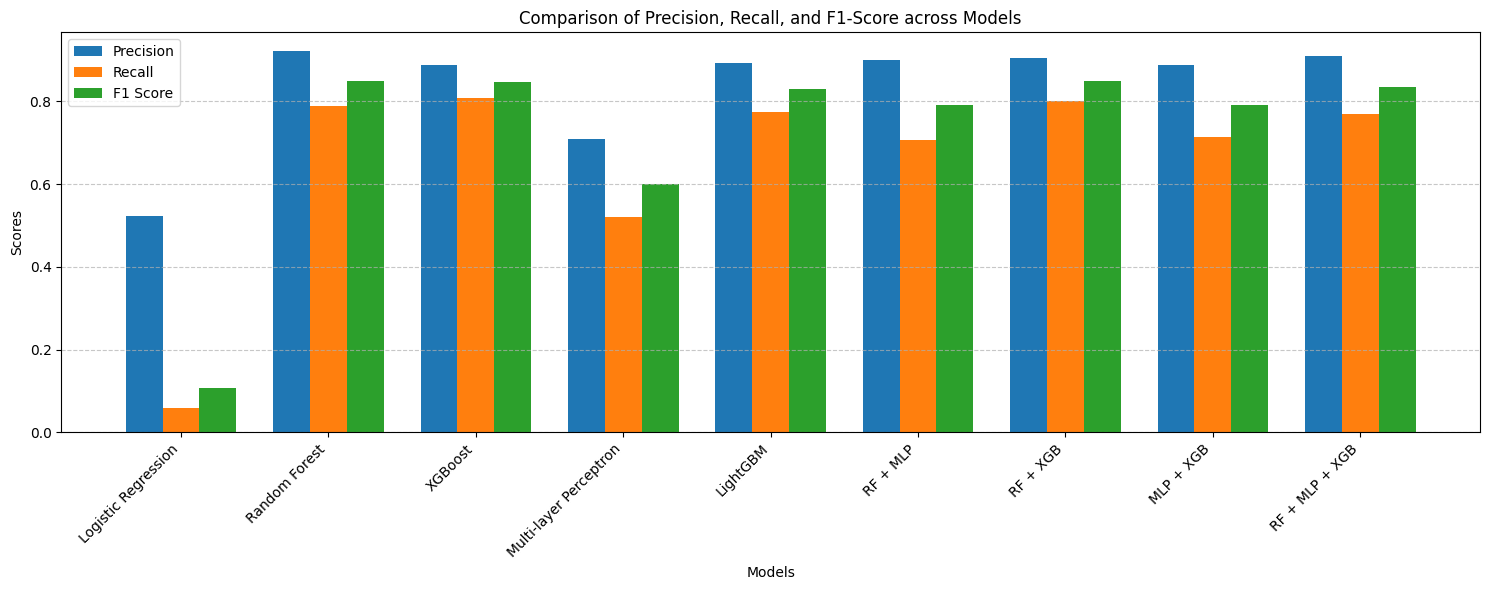

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu thực tế từ kết quả của bạn
models = [
    "Logistic Regression", "Random Forest", "XGBoost", "Multi-layer Perceptron",
    "LightGBM", "RF + MLP", "RF + XGB", "MLP + XGB", "RF + MLP + XGB"
]

precision_scores = [0.524, 0.921, 0.888, 0.709, 0.892, 0.899, 0.904, 0.887, 0.911]
recall_scores = [0.060, 0.790, 0.809, 0.521, 0.775, 0.706, 0.802, 0.715, 0.769]
f1_scores = [0.108, 0.850, 0.846, 0.600, 0.829, 0.791, 0.850, 0.792, 0.834]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(15, 6))
bars1 = ax.bar(x - width, precision_scores, width, label='Precision')
bars2 = ax.bar(x, recall_scores, width, label='Recall')
bars3 = ax.bar(x + width, f1_scores, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1-Score across Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Use best model for feature selection

## Feature importance

In [29]:
#RF & XGB là 2 model tốt nhất, XGB có recall cao hơn và ensemble RF + XGB > RF => Feature selection sử dụng ensemble
#feature importance RF & XGB
rf_importances = rf.feature_importances_
xgb_importances = xgb.feature_importances_

In [43]:
#  DataFrame with RF_Imp & XGB_Imp (Importance of RF & XGB)
imp_df = pd.DataFrame({
    'Feature': X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else [f'Feature_{i}' for i in range(X_train_scaled.shape[1])],
    'RF_Imp': rf_importances,
    'XGB_Imp': xgb_importances,
})

# Ensemble - importance count using imp of rf + imp of xgb then divide 2
imp_df['Imp'] = (imp_df['RF_Imp'] + imp_df['XGB_Imp']) / 2

# Ensemble - importance max
imp_df['Imp_max'] = imp_df[['RF_Imp', 'XGB_Imp']].max(axis=1)
imp_df_sorted = imp_df.sort_values(by="Imp", ascending=False)
imp_df_max_sorted = imp_df.sort_values(by="Imp_max", ascending=False)

In [44]:
imp_df_sorted.head(20) #imp sorted mean

,Feature,RF_Imp,XGB_Imp,Imp,Imp_max
4,lifetime_in_blocks,0.025707,0.275653,0.150680,0.275653
50,transacted_w_address_total,0.088648,0.054979,0.071813,0.088648
6,first_sent_block,0.061044,0.053097,0.057071,0.061044
8,num_timesteps_appeared_in,0.006471,0.089482,0.047976,0.089482
25,fees_min,0.050421,0.025608,0.038015,0.050421
26,fees_max,0.054713,0.020242,0.037478,0.054713
3,last_block_appeared_in,0.052053,0.014781,0.033417,0.052053
28,fees_median,0.048836,0.015942,0.032389,0.048836
31,fees_as_share_max,0.036947,0.025729,0.031338,0.036947
2,first_block_appeared_in,0.052342,0.010237,0.031289,0.052342


In [45]:
imp_df_max_sorted.head(20)

,Feature,RF_Imp,XGB_Imp,Imp,Imp_max
4,lifetime_in_blocks,0.025707,0.275653,0.150680,0.275653
8,num_timesteps_appeared_in,0.006471,0.089482,0.047976,0.089482
50,transacted_w_address_total,0.088648,0.054979,0.071813,0.088648
6,first_sent_block,0.061044,0.053097,0.057071,0.061044
26,fees_max,0.054713,0.020242,0.037478,0.054713
2,first_block_appeared_in,0.052342,0.010237,0.031289,0.052342
3,last_block_appeared_in,0.052053,0.014781,0.033417,0.052053
25,fees_min,0.050421,0.025608,0.038015,0.050421
28,fees_median,0.048836,0.015942,0.032389,0.048836
27,fees_mean,0.048530,0.009982,0.029256,0.048530


### Lấy top & bot 20 feature theo Feature importance theo max & mean

In [47]:
#FI mean
top20_fi = imp_df_sorted.head(20)['Feature'].tolist()
bottom20_fi = imp_df_sorted.tail(20)['Feature'].tolist()

# FI max
top20_fi_max = imp_df_max_sorted.head(20)['Feature'].tolist()
bottom20_fi_max = imp_df_max_sorted.tail(20)['Feature'].tolist()

# Tương tự với PFI, DCFI sau khi tính
# top20_pfi, bottom20_pfi, top20_dcfi, bottom20_dcfi

## PFI (Permutation feature importance)

In [49]:
import eli5
from eli5.sklearn import PermutationImportance
import pandas as pd
import matplotlib.pyplot as plt


# 1. Tính PFI riêng cho RF
perm_rf = PermutationImportance(rf, random_state=42).fit(X_test_scaled, y_test)
pfi_rf = eli5.explain_weights_df(perm_rf, feature_names=X_test_scaled.columns.tolist())
pfi_rf = pfi_rf[['feature', 'weight']].rename(columns={'weight': 'weight_rf'})

# 2. Tính PFI riêng cho XGB
perm_xgb = PermutationImportance(xgb, random_state=42).fit(X_test_scaled, y_test)
pfi_xgb = eli5.explain_weights_df(perm_xgb, feature_names=X_test_scaled.columns.tolist())
pfi_xgb = pfi_xgb[['feature', 'weight']].rename(columns={'weight': 'weight_xgb'})

# 3. Gộp điểm PFI từ 2 model theo feature
pfi_merged = pd.merge(pfi_rf, pfi_xgb, on='feature')

# 4. Tính mean và max điểm PFI
pfi_merged['weight_mean'] = (pfi_merged['weight_rf'] + pfi_merged['weight_xgb']) / 2
pfi_merged['weight_max'] = pfi_merged[['weight_rf', 'weight_xgb']].max(axis=1)

# 5. Sắp xếp và lấy top 20, bottom 20 theo mean
top20_pfi_mean = pfi_merged.sort_values('weight_mean', ascending=False).head(20)['feature'].tolist()
bottom20_pfi_mean = pfi_merged.sort_values('weight_mean', ascending=True).head(20)['feature'].tolist()

# 6. Sắp xếp và lấy top 20, bottom 20 theo max
top20_pfi_max = pfi_merged.sort_values('weight_max', ascending=False).head(20)['feature'].tolist()
bottom20_pfi_max = pfi_merged.sort_values('weight_max', ascending=True).head(20)['feature'].tolist()

In [ ]:
df_wallets_features_classes_combined

## DCFI (Drop Column Feature Importance)

In [ ]:
from sklearn.base import clone
import pandas as pd

def compute_dcfi(model, X_train, y_train, random_state=42):
    # clone model để tránh ảnh hưởng bên ngoài
    model_clone = clone(model)
    if hasattr(model_clone, 'random_state'):
        model_clone.random_state = random_state
    
    # Nếu là DataFrame thì lấy .values, nếu là numpy thì giữ nguyên
    X_train_array = X_train.values if hasattr(X_train, 'values') else X_train
    y_train_array = y_train.values if hasattr(y_train, 'values') else y_train
    
    # train trên full features
    model_clone.fit(X_train_array, y_train_array)
    benchmark_score = model_clone.score(X_train_array, y_train_array)
    
    importances = []
    for col in range(X_train_array.shape[1]):
        model_clone = clone(model)
        if hasattr(model_clone, 'random_state'):
            model_clone.random_state = random_state
        
        # Drop column col: nếu DataFrame thì drop theo tên, nếu numpy thì drop theo index
        if hasattr(X_train, 'columns'):
            X_subset = X_train.drop(X_train.columns[col], axis=1)
            X_subset_array = X_subset.values
        else:
            X_subset_array = np.delete(X_train_array, col, axis=1)
        
        model_clone.fit(X_subset_array, y_train_array)
        drop_col_score = model_clone.score(X_subset_array, y_train_array)
        importances.append(benchmark_score - drop_col_score)
    
    # Lấy tên feature nếu có, hoặc tạo tên giả
    if hasattr(X_train, 'columns'):
        features = X_train.columns
    else:
        features = [f'Feature_{i}' for i in range(X_train_array.shape[1])]
    
    dcfi_df = pd.DataFrame({
        'Feature': features,
        'Imp': importances
    }).sort_values('Imp', ascending=False).reset_index(drop=True)
    
    return dcfi_df


# Tính DCFI cho RF và XGB
dcfi_rf = compute_dcfi(rf, X_train_scaled, y_train)
dcfi_xgb = compute_dcfi(xgb, X_train_scaled, y_train)

# Gộp vào một DataFrame chung
dcfi_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'RF_Imp': dcfi_rf['Imp'].values,
    'XGB_Imp': dcfi_xgb['Imp'].values,
})

# Tổng hợp mean và max
dcfi_df['Imp_mean'] = dcfi_df[['RF_Imp', 'XGB_Imp']].mean(axis=1)
dcfi_df['Imp_max'] = dcfi_df[['RF_Imp', 'XGB_Imp']].max(axis=1)

# Sắp xếp theo mean hoặc max tùy mục đích
dcfi_df_sorted_mean = dcfi_df.sort_values('Imp_mean', ascending=False).reset_index(drop=True)
dcfi_df_sorted_max = dcfi_df.sort_values('Imp_max', ascending=False).reset_index(drop=True)

print("Top features theo DCFI mean:")
print(dcfi_df_sorted_mean.head(20))

print("\nTop features theo DCFI max:")
print(dcfi_df_sorted_max.head(20))


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. FI
fi_mean_df = imp_df_sorted[['Feature', 'Imp']].rename(columns={'Imp': 'FI_Mean'})
fi_max_df = imp_df_max_sorted[['Feature', 'Imp']].rename(columns={'Imp': 'FI_Max'})

# 2. PFI
pfi_mean_df = pfi_merged[['feature', 'weight_mean']].rename(columns={'feature': 'Feature', 'weight_mean': 'PFI_Mean'})
pfi_max_df = pfi_merged[['feature', 'weight_max']].rename(columns={'feature': 'Feature', 'weight_max': 'PFI_Max'})

# 3. DCFI
dcfi_mean_df = dcfi_df[['Feature', 'Imp_mean']].rename(columns={'Imp_mean': 'DCFI_Mean'})
dcfi_max_df = dcfi_df[['Feature', 'Imp_max']].rename(columns={'Imp_max': 'DCFI_Max'})

# Merge toàn bộ
merged = fi_mean_df.merge(pfi_mean_df, on='Feature').merge(dcfi_mean_df, on='Feature')
merged_max = fi_max_df.merge(pfi_max_df, on='Feature').merge(dcfi_max_df, on='Feature')

# Chuẩn hóa
scaler = MinMaxScaler()
merged[['FI_Mean', 'PFI_Mean', 'DCFI_Mean']] = scaler.fit_transform(merged[['FI_Mean', 'PFI_Mean', 'DCFI_Mean']])
merged_max[['FI_Max', 'PFI_Max', 'DCFI_Max']] = scaler.fit_transform(merged_max[['FI_Max', 'PFI_Max', 'DCFI_Max']])


In [ ]:
# Mean-based tổng hợp
merged['Mean_Score'] = merged[['FI_Mean', 'PFI_Mean', 'DCFI_Mean']].mean(axis=1)
merged_max['Max_Score'] = merged_max[['FI_Max', 'PFI_Max', 'DCFI_Max']].max(axis=1)


In [ ]:
# Top và bottom 20 theo trung bình
top20_mean = merged.sort_values('Mean_Score', ascending=False).head(20)['Feature'].tolist()
bottom20_mean = merged.sort_values('Mean_Score', ascending=True).head(20)['Feature'].tolist()

# Top và bottom 20 theo max
top20_max = merged_max.sort_values('Max_Score', ascending=False).head(20)['Feature'].tolist()
bottom20_max = merged_max.sort_values('Max_Score', ascending=True).head(20)['Feature'].tolist()
